# EINmodel for desicion making

Found 1 parameter sets with 2 attractors.


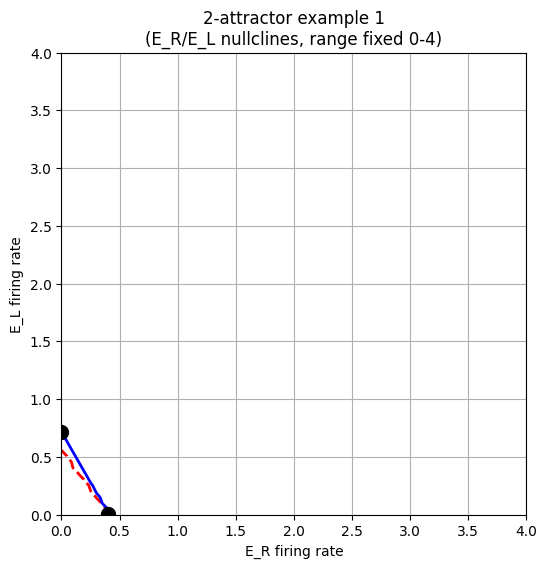

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def threshold_linear(x, gain=1.0, theta=0.0):
    return np.maximum(gain * x - theta, 0)
def phi_E(x):
    return threshold_linear(x, gain=1.0, theta=-0.1)
def phi_I(x):
    return threshold_linear(x, gain=4.0, theta=5.0)

tau_E = 10.0
tau_I = 5.0

def dX_dt(X, par):
    E_R, E_L, I_R, I_L = X
    (WEE_RR, WEE_RL, WEE_LR, WEE_LL,
     WEI_RR, WEI_LR, WEI_RL, WEI_LL,
     WIE_R, WIE_L, WIE_Rp, WIE_Lp,
     IE_R, IE_L) = par

    dE_R = (-E_R + phi_E(WEE_RR*E_R + WEE_RL*E_L - WEI_RR*I_R - WEI_LR*I_L + IE_R)) / tau_E
    dE_L = (-E_L + phi_E(WEE_LL*E_L + WEE_LR*E_R - WEI_LL*I_L - WEI_RL*I_R + IE_L)) / tau_E
    dI_R = (-I_R + phi_I(WIE_R*E_R + WIE_L*E_L)) / tau_I
    dI_L = (-I_L + phi_I(WIE_Rp*E_R + WIE_Lp*E_L)) / tau_I
    return np.array([dE_R, dE_L, dI_R, dI_L])

n_samples = 100
E_grid = np.linspace(0, 2.0, 4)
I_grid = np.linspace(0, 2.0, 4)
X0_grid = np.array([[e_r, e_l, i_r, i_l]
                    for e_r in E_grid
                    for e_l in E_grid
                    for i_r in I_grid
                    for i_l in I_grid])

np.random.seed(42)
two_attractor_params = []
for s in range(n_samples):
    par = np.random.uniform(0.5, 4.0, 12)
    inputs = np.random.uniform(0.0, 4.0, 2)
    full_par = np.concatenate([par, inputs])
    roots = []
    for X0 in X0_grid:
        sol = root(lambda X: dX_dt(X, full_par), X0, method='hybr')
        if sol.success:
            X_fp = np.round(sol.x, decimals=3)
            if np.all(X_fp >= 0) and np.all(X_fp <= 4.0):
                if not any(np.linalg.norm(X_fp - r) < 0.05 for r in roots):
                    roots.append(X_fp)
    if len(roots) == 2:
        two_attractor_params.append({
            "params": full_par,
            "fixed_points": roots
        })

print(f"Found {len(two_attractor_params)} parameter sets with 2 attractors.")

# 可視化（E_R vs E_Lのみ2D投影, nullcline追加, 範囲0-4固定）
for idx, res in enumerate(two_attractor_params):
    fig, ax = plt.subplots(figsize=(6,6))
    # nullcline計算用グリッド
    E_range = np.linspace(0, 4, 80)
    E_R_grid, E_L_grid = np.meshgrid(E_range, E_range)
    dER = np.zeros_like(E_R_grid)
    dEL = np.zeros_like(E_L_grid)
    # I_R, I_LはE_R, E_Lの関数として近似（steady-state）
    for i in range(E_R_grid.shape[0]):
        for j in range(E_L_grid.shape[1]):
            E_R = E_R_grid[i, j]
            E_L = E_L_grid[i, j]
            # I_R, I_Lをsteady-state近似
            p = res["params"]
            I_R = phi_I(p[8]*E_R + p[9]*E_L)
            I_L = phi_I(p[10]*E_R + p[11]*E_L)
            dER[i, j] = (-E_R + phi_E(p[0]*E_R + p[1]*E_L - p[4]*I_R - p[5]*I_L + p[12])) / tau_E
            dEL[i, j] = (-E_L + phi_E(p[3]*E_L + p[2]*E_R - p[7]*I_L - p[6]*I_R + p[13])) / tau_E
    # nullcline等高線
    c1 = ax.contour(E_R_grid, E_L_grid, dER, levels=[0], colors='red', linewidths=2, linestyles='--')
    c2 = ax.contour(E_R_grid, E_L_grid, dEL, levels=[0], colors='blue', linewidths=2, linestyles='-')
    # 固定点
    for pt in res["fixed_points"]:
        ax.plot(pt[0], pt[1], 'ko', markersize=10)
    ax.set_xlim(0,4)
    ax.set_ylim(0,4)
    ax.set_xlabel("E_R firing rate")
    ax.set_ylabel("E_L firing rate")
    ax.set_title(
        f"2-attractor example {idx+1}\n"
        f"(E_R/E_L nullclines, range fixed 0-4)"
    )
    ax.grid()
    plt.show()


Found 2 parameter sets with 2 attractors.


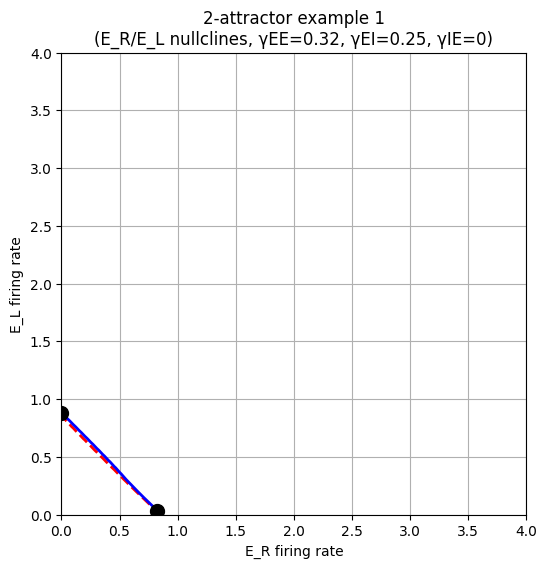

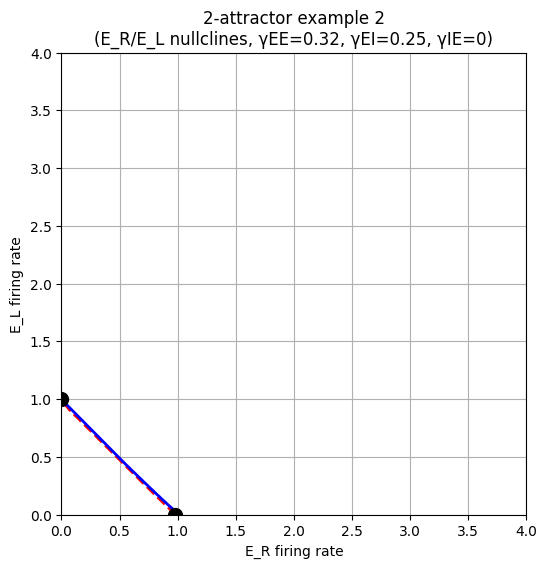

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def threshold_linear(x, gain=1.0, theta=0.0):
    return np.maximum(gain * x - theta, 0)
def phi_E(x):
    return threshold_linear(x, gain=1.0, theta=-0.1)
def phi_I(x):
    return threshold_linear(x, gain=4.0, theta=5.0)

tau_E = 10.0
tau_I = 5.0

def dX_dt(X, par):
    E_R, E_L, I_R, I_L = X
    (WEE_RR, WEE_RL, WEE_LR, WEE_LL,
     WEI_RR, WEI_LR, WEI_RL, WEI_LL,
     WIE_R, WIE_L, WIE_Rp, WIE_Lp,
     IE_R, IE_L) = par

    dE_R = (-E_R + phi_E(WEE_RR*E_R + WEE_RL*E_L - WEI_RR*I_R - WEI_LR*I_L + IE_R)) / tau_E
    dE_L = (-E_L + phi_E(WEE_LL*E_L + WEE_LR*E_R - WEI_LL*I_L - WEI_RL*I_R + IE_L)) / tau_E
    dI_R = (-I_R + phi_I(WIE_R*E_R + WIE_L*E_L)) / tau_I
    dI_L = (-I_L + phi_I(WIE_Rp*E_R + WIE_Lp*E_L)) / tau_I
    return np.array([dE_R, dE_L, dI_R, dI_L])

# 1. γ値を指定
gamma_EE = 0.32
gamma_EI = 0.25
gamma_IE = 0

# 2. サーチ対象：スカラー結合重みを乱数でサーチ
n_samples = 100
E_grid = np.linspace(0, 2.0, 4)
I_grid = np.linspace(0, 2.0, 4)
X0_grid = np.array([[e_r, e_l, i_r, i_l]
                    for e_r in E_grid
                    for e_l in E_grid
                    for i_r in I_grid
                    for i_l in I_grid])

np.random.seed(42)
two_attractor_params = []
for s in range(n_samples):
    # スカラー重みパラメータのみ乱数でサーチ
    WEE = np.random.uniform(0.5, 4.0)
    WEI = np.random.uniform(0.5, 4.0)
    WIE = np.random.uniform(0.5, 4.0)
    # γで接続特異性を反映
    WEE_RR = WEE_LL = WEE * (1 + gamma_EE)
    WEE_RL = WEE_LR = WEE * (1 - gamma_EE)
    WEI_RR = WEI_LL = WEI * (1 + gamma_EI)
    WEI_RL = WEI_LR = WEI * (1 - gamma_EI)
    WIE_R  = WIE * (1 + gamma_IE)
    WIE_L  = WIE * (1 - gamma_IE)
    WIE_Rp = WIE * (1 + gamma_IE)
    WIE_Lp = WIE * (1 - gamma_IE)
    # 入力も乱数
    IE_R, IE_L = np.random.uniform(0.0, 4.0, 2)
    full_par = np.array([WEE_RR, WEE_RL, WEE_LR, WEE_LL,
                         WEI_RR, WEI_LR, WEI_RL, WEI_LL,
                         WIE_R, WIE_L, WIE_Rp, WIE_Lp,
                         IE_R, IE_L])
    roots = []
    for X0 in X0_grid:
        sol = root(lambda X: dX_dt(X, full_par), X0, method='hybr')
        if sol.success:
            X_fp = np.round(sol.x, decimals=3)
            if np.all(X_fp >= 0) and np.all(X_fp <= 4.0):
                if not any(np.linalg.norm(X_fp - r) < 0.05 for r in roots):
                    roots.append(X_fp)
    if len(roots) == 2:
        two_attractor_params.append({
            "params": full_par,
            "fixed_points": roots
        })

print(f"Found {len(two_attractor_params)} parameter sets with 2 attractors.")

# 可視化（E_R vs E_Lのみ2D投影, nullcline追加, 範囲0-4固定）
for idx, res in enumerate(two_attractor_params):
    fig, ax = plt.subplots(figsize=(6,6))
    E_range = np.linspace(0, 4, 80)
    E_R_grid, E_L_grid = np.meshgrid(E_range, E_range)
    dER = np.zeros_like(E_R_grid)
    dEL = np.zeros_like(E_L_grid)
    p = res["params"]
    for i in range(E_R_grid.shape[0]):
        for j in range(E_L_grid.shape[1]):
            E_R = E_R_grid[i, j]
            E_L = E_L_grid[i, j]
            I_R = phi_I(p[8]*E_R + p[9]*E_L)
            I_L = phi_I(p[10]*E_R + p[11]*E_L)
            dER[i, j] = (-E_R + phi_E(p[0]*E_R + p[1]*E_L - p[4]*I_R - p[5]*I_L + p[12])) / tau_E
            dEL[i, j] = (-E_L + phi_E(p[3]*E_L + p[2]*E_R - p[7]*I_L - p[6]*I_R + p[13])) / tau_E
    c1 = ax.contour(E_R_grid, E_L_grid, dER, levels=[0], colors='red', linewidths=2, linestyles='--')
    c2 = ax.contour(E_R_grid, E_L_grid, dEL, levels=[0], colors='blue', linewidths=2, linestyles='-')
    for pt in res["fixed_points"]:
        ax.plot(pt[0], pt[1], 'ko', markersize=10)
    ax.set_xlim(0,4)
    ax.set_ylim(0,4)
    ax.set_xlabel("E_R firing rate")
    ax.set_ylabel("E_L firing rate")
    ax.set_title(
        f"2-attractor example {idx+1}\n"
        f"(E_R/E_L nullclines, γEE={gamma_EE}, γEI={gamma_EI}, γIE={gamma_IE})"
    )
    ax.grid()
    plt.show()


Found 2 fixed points.


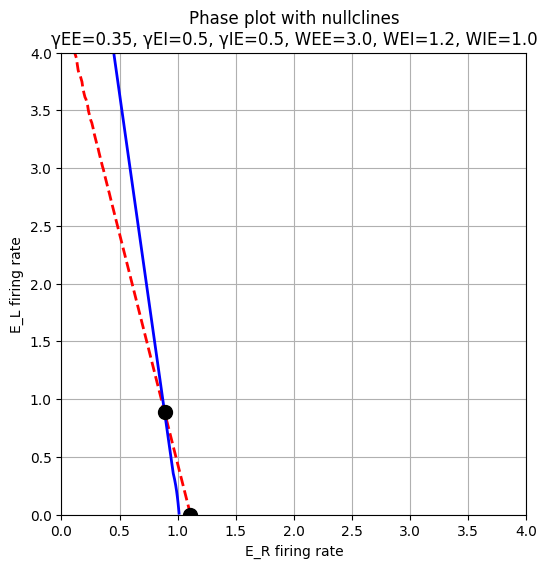

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def threshold_linear(x, gain=1.0, theta=0.0):
    return np.maximum(gain * x - theta, 0)
def phi_E(x):
    return threshold_linear(x, gain=1.0, theta=-0.1)
def phi_I(x):
    return threshold_linear(x, gain=4.0, theta=5.0)

tau_E = 10.0
tau_I = 5.0

def dX_dt(X, par):
    E_R, E_L, I_R, I_L = X
    (WEE_RR, WEE_RL, WEE_LR, WEE_LL,
     WEI_RR, WEI_LR, WEI_RL, WEI_LL,
     WIE_R, WIE_L, WIE_Rp, WIE_Lp,
     IE_R, IE_L) = par

    dE_R = (-E_R + phi_E(WEE_RR*E_R + WEE_RL*E_L - WEI_RR*I_R - WEI_LR*I_L + IE_R)) / tau_E
    dE_L = (-E_L + phi_E(WEE_LL*E_L + WEE_LR*E_R - WEI_LL*I_L - WEI_RL*I_R + IE_L)) / tau_E
    dI_R = (-I_R + phi_I(WIE_R*E_R + WIE_L*E_L)) / tau_I
    dI_L = (-I_L + phi_I(WIE_Rp*E_R + WIE_Lp*E_L)) / tau_I
    return np.array([dE_R, dE_L, dI_R, dI_L])

# ---- 推奨パラメータ設定 ----
gamma_EE = 0.35  # 集団特異性最大
gamma_EI = 0.5
gamma_IE = 0.5

WEE = 3.0  # 強め
WEI = 1.2  # 強め
WIE = 1.0  # 十分

# γで結合特異性を反映
WEE_RR = WEE_LL = WEE * (1 + gamma_EE)
WEE_RL = WEE_LR = WEE * (1 - gamma_EE)
WEI_RR = WEI_LL = WEI * (1 + gamma_EI)
WEI_RL = WEI_LR = WEI * (1 - gamma_EI)
WIE_R  = WIE * (1 + gamma_IE)
WIE_L  = WIE * (1 - gamma_IE)
WIE_Rp = WIE * (1 + gamma_IE)
WIE_Lp = WIE * (1 - gamma_IE)

IE_R = IE_L = 0.5

# パラメータベクトル
full_par = np.array([WEE_RR, WEE_RL, WEE_LR, WEE_LL,
                     WEI_RR, WEI_LR, WEI_RL, WEI_LL,
                     WIE_R, WIE_L, WIE_Rp, WIE_Lp,
                     IE_R, IE_L])

# 固定点探索
E_grid = np.linspace(0, 2.0, 4)
I_grid = np.linspace(0, 2.0, 4)
X0_grid = np.array([[e_r, e_l, i_r, i_l]
                    for e_r in E_grid
                    for e_l in E_grid
                    for i_r in I_grid
                    for i_l in I_grid])

roots = []
for X0 in X0_grid:
    sol = root(lambda X: dX_dt(X, full_par), X0, method='hybr')
    if sol.success:
        X_fp = np.round(sol.x, decimals=3)
        if np.all(X_fp >= 0) and np.all(X_fp <= 4.0):
            if not any(np.linalg.norm(X_fp - r) < 0.05 for r in roots):
                roots.append(X_fp)

print(f"Found {len(roots)} fixed points.")

# phaseplot（E_R vs E_L, nullcline付き）
fig, ax = plt.subplots(figsize=(6,6))
E_range = np.linspace(0, 4, 80)
E_R_grid, E_L_grid = np.meshgrid(E_range, E_range)
dER = np.zeros_like(E_R_grid)
dEL = np.zeros_like(E_L_grid)
for i in range(E_R_grid.shape[0]):
    for j in range(E_L_grid.shape[1]):
        E_R = E_R_grid[i, j]
        E_L = E_L_grid[i, j]
        I_R = phi_I(full_par[8]*E_R + full_par[9]*E_L)
        I_L = phi_I(full_par[10]*E_R + full_par[11]*E_L)
        dER[i, j] = (-E_R + phi_E(full_par[0]*E_R + full_par[1]*E_L - full_par[4]*I_R - full_par[5]*I_L + full_par[12])) / tau_E
        dEL[i, j] = (-E_L + phi_E(full_par[3]*E_L + full_par[2]*E_R - full_par[7]*I_L - full_par[6]*I_R + full_par[13])) / tau_E
# nullcline等高線
c1 = ax.contour(E_R_grid, E_L_grid, dER, levels=[0], colors='red', linewidths=2, linestyles='--')
c2 = ax.contour(E_R_grid, E_L_grid, dEL, levels=[0], colors='blue', linewidths=2, linestyles='-')
# 固定点
for pt in roots:
    ax.plot(pt[0], pt[1], 'ko', markersize=10)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_xlabel("E_R firing rate")
ax.set_ylabel("E_L firing rate")
ax.set_title(
    f"Phase plot with nullclines\n"
    f"γEE={gamma_EE}, γEI={gamma_EI}, γIE={gamma_IE}, WEE={WEE}, WEI={WEI}, WIE={WIE}"
)
ax.grid()
plt.show()
